## Some examples for testing the `ClassicalDotSystem` class

In [1]:
import numpy as np
from qtt.simulation.classicaldotsystem import ClassicalDotSystem, TripleDot

PyQt4 (API v2)


<IPython.core.display.Javascript object>

In [2]:
test_dot = TripleDot()

In [3]:
temp_state = test_dot.calculate_ground_state(np.array([0,0,0]))
temp_state

array([0, 0, 0])

In [4]:
# make a test gate plane
nx = 150
ny = 150
test2Dparams = np.zeros((3,nx,ny))
sweepx = np.linspace(0, 300, nx)
sweepy = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(sweepx, sweepy)
test2Dparams[0] = xv+yv
xv, yv = np.meshgrid(sweepy, sweepx)
test2Dparams[1] = xv+yv

# run the honeycomb simulation
test_dot.simulate_honeycomb(test2Dparams, multiprocess=True)

simulatehoneycomb: 14.8 [s]


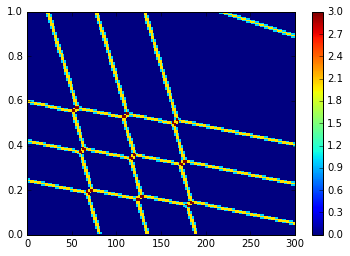

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.pcolor(sweepx,sweepy,test_dot.honeycomb)
plt.colorbar()
plt.show()

In [6]:
class TestDot(ClassicalDotSystem):
    def __init__(self, name='testdot', **kwargs):
        super().__init__(name=name, ndots=3, ngates=3, maxelectrons=2, **kwargs)

        self.makebasis()

        vardict = {}

        vardict["mu0_values"] = np.array([-27.0, -20.0, -25.0])  # chemical potential at zero gate voltage
        vardict["Eadd_values"] = np.array([54.0, 52.8, 54.0])  # addition energy
        vardict["W_values"] = np.array([12.0, 5.0, 10.0])  # coulomb repulsion (!order is important: (1,2), (1,3), (2,3)) (lexicographic ordering)
        vardict["alpha_values"] = np.array([[1.0, 0.25, 0.1],
                                 [0.25, 1.0, 0.25],
                                 [0.1, 0.25, 1.0]])

        for name in self.varnames:
            setattr(self, name, vardict[name+'_values'])

In [7]:
test_dot_2 = TestDot()

# make a test gate plane
nx = 100
ny = 100
test2Dparams = np.zeros((3,nx,ny))
sweepx = np.linspace(0, 200, nx)
sweepy = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(sweepx, sweepy)
test2Dparams[0] = xv+yv
xv, yv = np.meshgrid(sweepy, sweepx)
test2Dparams[1] = xv+yv

# run the honeycomb simulation
test_dot_2.simulate_honeycomb(test2Dparams)

simulatehoneycomb: 3.2 [s]


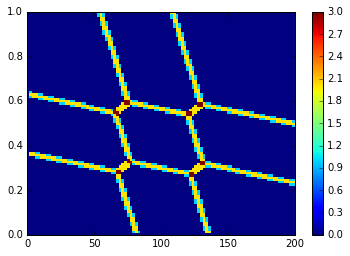

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.pcolor(sweepx,sweepy,test_dot_2.honeycomb)
plt.colorbar()
plt.show()